Sveučilište u Zagrebu<br>
Fakultet elektrotehnike i računarstva

# Strojno učenje
<a href="http://www.fer.unizg.hr/predmet/su">http://www.fer.unizg.hr/predmet/su</a>

Ak. god. 2015./2016.

# Laboratorijska vježba 4: Neparametarski modeli i vrednovanje modela

# Studentica: Petra Marče (0036473653)

(c) 2015 Jan Šnajder, Domagoj Alagić

*Verzija 0.2*

Objavljeno: **7. siječnja 2016.**<br>
Rok za predaju: **11-15. siječnja 2016.**

## Upute

Laboratorijska vježba 4 sastoji se od 8 zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg koda te evaluiranja ćelija. Odgovore na pitanja **nemojte pisati** u bilježnicu koju ćete demonstrirati asistentu (kako ih pri predaji ne biste samo čitali).

Osigurajte da u potpunosti **razumijete** kod koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta preinačiti i ponovno evaluirati Vaš kod. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Stoga se nemojte ograničiti samo na to da riješite zadatak, već slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [15]:
# Učitaj osnovne biblioteke...
import scipy as sp
import sklearn
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


Pomoćna funkcija za iscrtavanje ulaznog prostora primjera i granice između klasa:

In [16]:
def plot_problem(X, y, h=None, surfaces=True) :
    '''
    Plots a two-dimensional labeled dataset (X,y) and, if function h(x) is given, 
    the decision boundaries (surfaces=False) or decision surfaces (surfaces=True)
    '''
    assert X.shape[1] == 2, "Dataset is not two-dimensional"
    if h != None : 
        # Create a mesh to plot in
        r = 0.02  # mesh resolution
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, r),
                             np.arange(y_min, y_max, r))
        XX = np.c_[xx.ravel(), yy.ravel()]
        try:
            Z_test = h(XX)
           
            if shape(Z_test) == () :
                # h returns a scalar when applied to a matrix; map explicitly
                Z = sp.array(map(h,XX))
            else :
                Z = Z_test
        except ValueError:
            # can't apply to a matrix; map explicitly
            Z = sp.array(map(h,XX))
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        if surfaces :
            plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)
        else :
            plt.contour(xx, yy, Z)
    # Plot the dataset
    scatter(X[:,0],X[:,1],c=y, cmap=plt.cm.Paired,marker='o',s=50);

## Zadatci

### 1. Implementacija algoritma k-nn

### (a)

Implementirajte klasu `KNN` koja implementira algoritam $k$ najbližih susjeda. Neobavezan parametar konstruktora jest broj susjeda ($k$), čija je podrazumijevana vrijednost 3. Definirajte metode `fit(X, y)` i `predict(X)`, koje služe za treniranje modela odnosno predikciju. Kao mjeru udaljenosti koristite euklidsku udaljenost ([`scipy.linalg.norm`](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linalg.norm.html)). Nije potrebno implementirati težinsku funkciju.

In [17]:
from scipy.linalg import norm
from sklearn.utils import check_array
from sklearn.metrics.pairwise import pairwise_distances


def check(X):
    if len(X.shape)==1:
        return X.reshape(1,-1)
    return X

def udaljenosti(X,fitX):
    return pairwise_distances(X,fitX,'euclidean',squared=True)

class kNN:
    def __init__(self,k=3):
        self.k=k
    def fit(self,X,y):
        self.X=X
        self.y=y
    def predict(self,Xs):
        Xs=check(Xs)
        predicted=np.empty(Xs.shape[0], dtype=self.y[0].dtype)
        for i,X in enumerate(Xs):
            d=udaljenosti(X.reshape(1,-1),self.X)
            sort_indeksi= numpy.argsort(d)[:self.k]
            neigh_ind = argpartition(d, self.k - 1, axis=1)
            neigh_ind = neigh_ind[:, :self.k]
            r=self.y[[neigh_ind]]
            brojJedinica=np.count_nonzero(r)
            if brojJedinica>self.k/2:
                predicted[i]=1
            else:
                predicted[i]=0
        return predicted
   
    


### (b)

Isprobajte algoritam implementiran u (a) dijelu zadatka na umjetno generiranome skupu s $n=2$ značajke, $K=2$ klase i $N=100$ primjera. Provjerite ispravnost algoritma tako da predikcije usporedite s onima algoritma [`sklearn.neighbors.KNeighborsClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier).

C:\Users\Petra\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


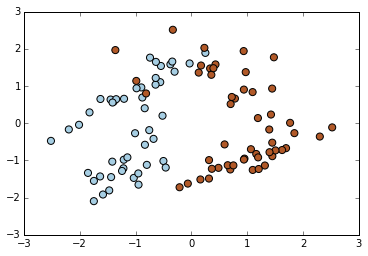

In [19]:
from sklearn.neighbors import NearestNeighbors
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn import neighbors

X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_redundant=0, n_clusters_per_class=2,random_state=19)
plot_problem(X, y)







In [20]:
clf=neighbors.KNeighborsClassifier(3)
clf.fit(X,y)

print("KNeighboursClassifier")
print(clf.predict(X))
print(accuracy_score(y,clf.predict(X)))

moj=kNN()
moj.fit(X,y)
print("moj kNN")
print(moj.predict(X))
print(accuracy_score(y,moj.predict(X)))

KNeighboursClassifier
[1 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 1 0 1 0 1 1
 1 1 0 0 1 1 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0 1 0 1 1 0
 1 0 0 1 0 0 1 0 1 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 0]
0.95
moj kNN
[1 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 1 0 1 0 1 1
 1 1 0 0 1 1 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0 1 0 1 1 0
 1 0 0 1 0 0 1 0 1 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 0]
0.95


### (c) 

Pomoću funkcije `plot_problem` iscrtajte prostor primjera i područja koja odgovaraju prvoj odnosno drugoj klasi. Eksperimentirajte s različitim vrijednostima za broj primjera $N$, broj susjeda $k$ i broj klasa $K$.

**NB:** Implementacija algoritma `KNeighborsClassifier` iz sklearna vjerojatno će raditi brže od vaše implementacije, pa koristite nju za iscrtavanje grafa. Naime, za iscrtavanje grafa potrebno je napraviti predikciju za svaku točku u regiji iscrtavanja.

**Q:** Kako hiperparametar $k$ utječe na izgled granice između klasa?
    
**Q:** U kojem slučaju (za koju vrijednost $k$) pogreška učenja može doseći nulu? Zašto?
    
**Q:** Kako biste odredili optimalnu vrijednost za $k$?

C:\Users\Petra\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


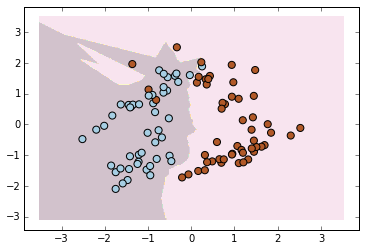

In [6]:
plot_problem(X,y,clf.predict)

### 2. Empirijska analiza algoritma k-nn

Algoritam k-nn ima hiperparametar $k$ (broj susjeda). Taj parametar izravno utječe na složenost algoritma, pa je važno dobro odabrati njegovu vrijednost. Kao i kod mnogih drugih algoritama, tako i kod algoritma k-nn optimalna vrijednost hiperametra $k$ ovisi o konkretnom problemu, uključivo broju primjera $N$, broju značajki (dimenzija) $n$ te broju klasa $K$. Svrha ovog zadatka jest provesti sustavnu empirijsku analizu ovih ovisnosti.

### (a)

Sintetički skup primjera od $N=200$ primjera s $n=2$ značajke i $K=2$ klase podijelite na skup za učenje i skup za ispitivanje u omjeru 7:3 (koristite funkciju [`sklearn.cross_validation.train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). Iscrtajte krivulje pogreške učenja i pogreške ispitivanja za $k\in\{1,\dots,20\}$.

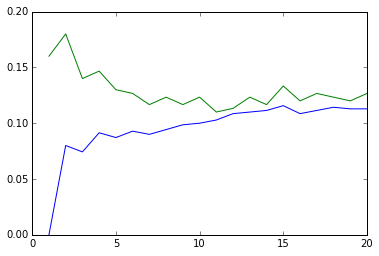

In [21]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import zero_one_loss

X, y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_redundant=0, n_clusters_per_class=2)
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,random_state=42)
ks=list(range(1,21))
train_err=np.empty(len(ks))
test_err=np.empty(len(ks))
clf.fit(X_train,y_train)
for i,k in enumerate(ks):
    clf.n_neighbors=k
    train_err[i]=zero_one_loss(y_train,clf.predict(X_train))
    test_err[i]=zero_one_loss(y_test,clf.predict(X_test))
plot(ks,train_err)
plot(ks,test_err)
    
    
# Vaš kôd ovdje...

**Q:** Kojem području odgovara prenaučenost, a kojem podnaučenost modela? Zašto?

**Q:** Jesu li ovi rezultati stabilni? Zašto?

### (b) 

Kako bismo dobili pouzdanije rezultate, potrebno je mjerenja ponoviti na različitim skupovima podataka i zatim uprosječiti dobivene vrijednosti pogreška. Definirajte funkciju

> `knn_eval(n_instances, n_features=2, n_classes=2, n_informative=2, test_size=0.3, k_range=(1, 20), n_trials=100)`

koja trenira i ispituje model k-nn na ukupno `n_instances` primjera, i to tako da za svaku vrijednost hiperparametra iz zadanog intervala `k_range` ponovi `n_trials` mjerenja, generirajući svaki puta nov skup podataka pomoću funkcije `make_classification`. Vrijednosti parametara `n_instances`, `n_features`, `n_classes` i `n_informative` proslijedite funkciji `make_classification` te dodatno postavite `n_redundant=0` i `n_clusters_per_class=1`. Svaki generirani skup primjera treba pomoću funkcije `train_test_split` podijeliti na skup za učenje i skup za ispitivanje, pri čemu je udio skupa za ispitivanje definiran  parametrom `test_size`. Tu podjelu nije potrebno dodatno ponavljati; dovoljno je što se u svakoj iteraciji generira posve nov skup primjera. Povratne vrijednosti funkcije jest trojka `(best_k, train_errors, test_errors)`. Vrijednost `best_k` je optimalna vrijednost hiperparametra $k$ (vrijednost za koju je pogreška na skupu za ispitivanje najmanja). Vrijednosti `train_errors` i `test_errors`  liste su pogrešaka na skupu za učenja odnosno skupu za testiranje za sve razmatrane vrijednosti hiperparametra $k$.

In [9]:
def knn_eval(n_instances, n_features=2, n_classes=2, n_informative=2, test_size=0.3, k_range=range(1, 20), n_trials=100):
    train_err=np.zeros(len(k_range))
    test_err=np.zeros(len(k_range))
    for i in range (0,n_trials):
        X, y = make_classification(n_samples=n_instances, n_features=n_features, n_classes=n_classes, n_redundant=0,n_informative=n_informative, n_clusters_per_class=1,random_state=117+i)
        X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=1-test_size,random_state=42+i)
        clf.fit(X_train,y_train)
        for i,k in enumerate(k_range):
            clf.n_neighbors=k
            
            train_err[i]+=zero_one_loss(y_train,clf.predict(X_train))
            test_err[i]+=zero_one_loss(y_test,clf.predict(X_test))
    train_err=train_err*(1/n_trials)
    test_err=test_err*(1/n_trials)
    best_k=k_range[argmin(test_err)]
    return (best_k,train_err,test_err)



### (c)

Pomoću funkcije `knn_eval` iz (b) dijela zadatka, iscrtajte pogrešku učenja i ispitivanja kao funkcije hiperparametra $k$, $k\in\{1,\dots,20\}$, za $N=200$ primjera. Ispišite i optimalnu vrijednost za $k$.

best_k= 5


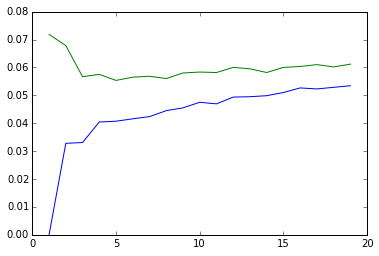

In [10]:
k_range=range(1,20)
N=200
best_k,train_err,test_err=knn_eval(N,k_range=k_range)
print("best_k=",best_k)
plot(k_range,train_err)
plot(k_range,test_err)

**Q:** Jesu li rezultati očekivani? Obrazložite.

### (d)

Pomoću funkcije `knn_eval` iz (b) dijela zadatka, iscrtajte pogreške učenja i ispitivanja kao funkcije hiperparametra $k$, $k\in\{1,\dots,20\}$, za $N=\{50, 100, 200, 500, 1000, 5000\}$ primjera. Načinite 6 zasebnih grafikona (generirajte ih u for-petlji). U svakoj iteraciji ispišite optimalnu vrijednost za $k$.

za N= 50 best_k= 3
za N= 100 best_k= 7
za N= 200 best_k= 5
za N= 500 best_k= 6
za N= 1000 best_k= 8
za N= 5000 best_k= 15
[3, 7, 5, 6, 8, 15]


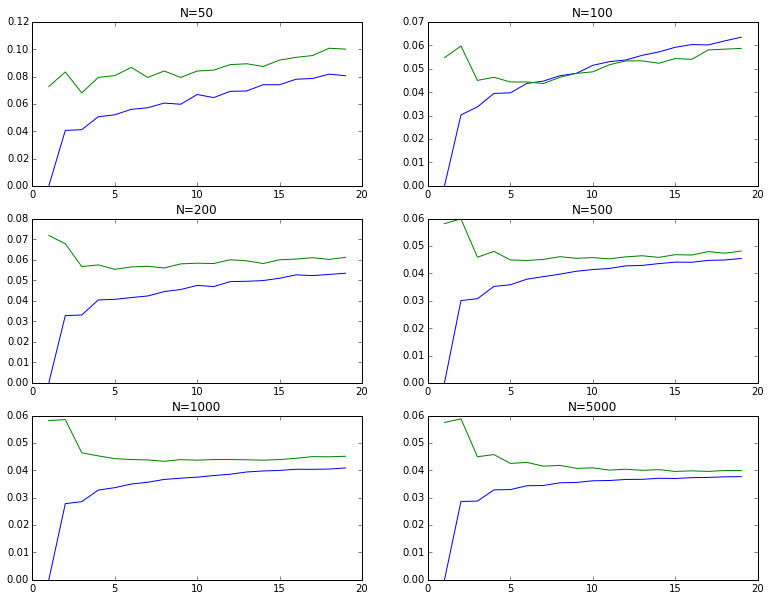

In [22]:
Ns=[50,100,200,500,1000,5000]
Ns_best_ks=[]
k_range=range(1,20)
fig=plt.figure(6,figsize=(13,10))
for i,N in enumerate(Ns):
    fig.add_subplot("32"+str(i+1))
    plt.title("N="+str(N))
    best_k,train_err,test_err=knn_eval(N,k_range=k_range)
    Ns_best_ks.append(best_k)
    print("za N=",str(N),"best_k=",best_k)
    plot(k_range,train_err)
    plot(k_range,test_err)
print(Ns_best_ks)

**Q:** Jesu li rezultati očekivani? Obrazložite.

### (e)

Pomoću funkcije `knn_eval` iz (b) dijela zadatka, iscrtajte pogreške učenja i ispitivanja kao funkcije hiperparametra $k$, $k\in\{1,\dots,20\}$, za broj dimenzija $n=\{2,3,\dots,10\}$, i to za $N=200$ primjera. Načinite 8 zasebnih grafikona (generirajte ih u for-petlji). U svakoj iteraciji ispišite optimalnu vrijednost za $k$.

In [ ]:
ns=range(2,10)
N=200
ns_best_ks=[]
fig=plt.figure(8,figsize=(13,15))
for i,n in enumerate(ns):
    fig.add_subplot("42"+str(i+1))
    plt.title("n="+str(n))
    best_k,train_err,test_err=knn_eval(N,k_range=k_range,n_features=n)
    ns_best_ks.append(best_k)
    print("za n=",str(n),"best_k=",best_k)
    plot(k_range,train_err)
    plot(k_range,test_err)
print(ns_best_ks)

za n= 2 best_k= 5
za n= 3 best_k= 5
za n= 4 best_k= 7
za n= 5 best_k= 17
za n= 6 best_k= 7
za n= 7 best_k= 19
za n=

**Q:** Jesu li rezultati očekivani? Obrazložite.

### (f)

Pomoću funkcije `knn_eval` iz (b) dijela zadatka, iscrtajte pogreške učenja i ispitivanja kao funkcije hiperparametra $k$, $k\in\{1,\dots,20\}$, za broj klasa $K=\{2,3,4,5\}$, i to za $N=200$ primjera. Načinite 4 zasebnih grafikona (generirajte ih u for-petlji). U svakoj iteraciji ispišite optimalnu vrijednost za $k$.

za K= 2 best_k= 3
za K= 3 best_k= 5
za K= 4 best_k= 3
za K= 5 best_k= 3
[3, 5, 3, 3]


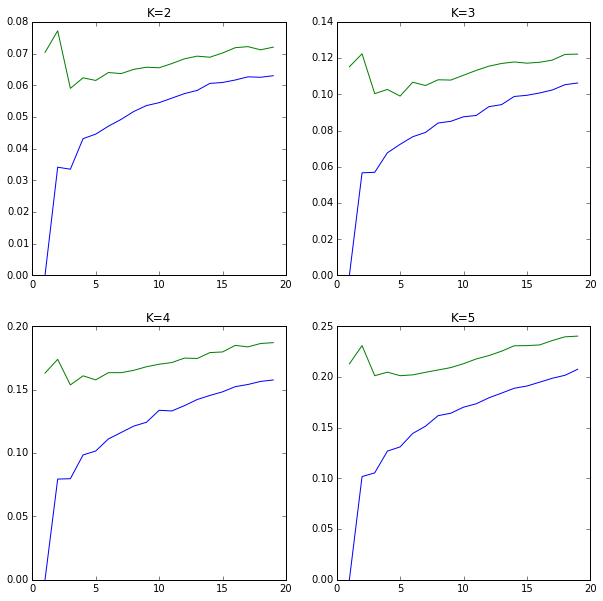

In [12]:
fig=plt.figure(4,figsize=(10,10))
ks=[2,3,4,5]
Ks_best_ks=[]
N=200
n=3
for i,k in enumerate(ks):
    fig.add_subplot("22"+str(i+1))
    plt.title("K="+str(k))
    best_k,train_err,test_err=knn_eval(N,n_classes=k,n_informative=3,n_features=n)
    Ks_best_ks.append(best_k)
    print("za K=",str(k),"best_k=",best_k)
    plot(k_range,train_err)
    plot(k_range,test_err)
print(Ks_best_ks)

**Q:** Jesu li rezultati očekivani? Obrazložite.

### (g)

U prethodnim zadatcima analizirali smo oblik krivulja pogreška u ovisnosti o $k$, za nekoliko odabranih vrijednosti parametara $N$, $n$ odnosno $K$. Tako dobiveni uvidi su korisni, međutim, u praksi ćemo vrijednost za $k$ optimirati na skupu za provjeru, pa nas zapravo zanima kako se pogreške ponašaju uz optimalnu vrijednost za $k$. 

Koristeću funkciju `knn_eval` iz (b) dijela zadatka, generirajte grafikone koji prikazuju pogreške učenja i ispitivanja za optimalnu vrijednost $k$ (vrijednost za koju je ispitna pogreška najmanja), i to (1) u ovisnosti o broju primjera ($N\in\{100, 200,\dots, 1000\}$), (2) broju značajki ($n\in\{2,\dots,10\})$ i (3) broju klasa ($K\in\{2,\dots,10\})$. Posljednja dva grafikona generirajte s $N=1000$ primjera. Ukupno trebate generirati tri grafikona, svaki s dvije krivulje (pogreška učenja i pogreška ispitivanja).

In [16]:
xs=(Ns,ns,ks)
best_ks=(Ns_best_ks,ns_best_ks,Ks_best_ks)
for x,best_k in zip(xs,best_ks):
    print(x,best_k)
    train_err=zeros(len(x))
    test_err=zeros(len(x))

[50, 100, 200, 500, 1000, 5000] [3, 7, 5, 6, 8, 15]
range(2, 10) [5, 3, 3, 3, 3, 3, 5, 5]
[2, 3, 4, 5] [3, 5, 3, 3]


3 [ 0.04114286] [ 0.068]
7 [ 0.04471429] [ 0.04366667]
5 [ 0.04071429] [ 0.05533333]
6 [ 0.03791429] [ 0.04473333]
8 [ 0.0367] [ 0.04333333]
15 [ 0.03704286] [ 0.03962]


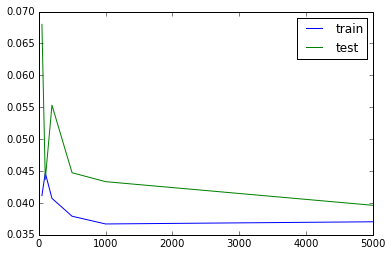

In [23]:
train_err_Ns=zeros(len(Ns))
test_err_Ns=zeros(len(Ns))
for i,N in enumerate(Ns):
    best_k=[Ns_best_ks[i]]
    k,train,test=knn_eval(N,k_range=best_k)
    train_err_Ns[i]=train[0]
    test_err_Ns[i]=test[0]
    print(k,train,test)
plot(Ns,train_err_Ns,label='train')
plot(Ns,test_err_Ns,label='test')
plt.legend()
plt.show()

5 [ 0.03368571] [ 0.0443]
3 [ 0.03134286] [ 0.05136667]
3 [ 0.03397143] [ 0.05873333]
3 [ 0.03695714] [ 0.06403333]
3 [ 0.04058571] [ 0.07313333]
3 [ 0.04324286] [ 0.0747]
5 [ 0.05207143] [ 0.0755]
5 [ 0.054] [ 0.0835]


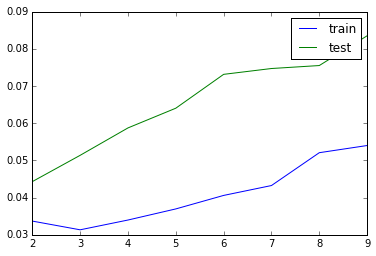

In [24]:
train_err_ns=zeros(len(ns))
test_err_ns=zeros(len(ns))
for i,n in enumerate(ns):
    best_k=[ns_best_ks[i]]
    k,train,test=knn_eval(1000,k_range=best_k,n_features=n)
    #k,train,test=knn_eval(1000,k_range=best_k,n_features=n,n_informative=n)
    train_err_ns[i]=train[0]
    test_err_ns[i]=test[0]
    if(k!=best_k[0]):
        print('alo')
    print(k,train,test)
plot(ns,train_err_ns,label='train')
plot(ns,test_err_ns,label='test')
plt.legend()
plt.show()

3 [ 0.02745714] [ 0.0436]
5 [ 0.0602] [ 0.0814]
3 [ 0.07422857] [ 0.12543333]
3 [ 0.09345714] [ 0.15783333]


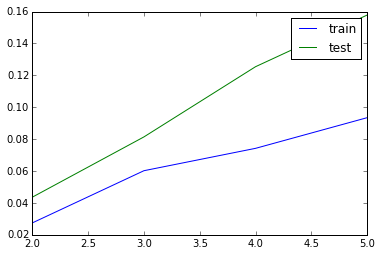

In [19]:
train_err_Ks=zeros(len(ks))
test_err_Ks=zeros(len(ks))
for i,K in enumerate(ks):
    best_k=[Ks_best_ks[i]]
    k,train,test=knn_eval(1000,k_range=best_k,n_classes=K,n_informative=3,n_features=3)
    train_err_Ks[i]=train[0]
    test_err_Ks[i]=test[0]
    if(k!=best_k[0]):
        print('alo')
    print(k,train,test)
plot(ks,train_err_Ks,label='train')
plot(ks,test_err_Ks,label='test')
plt.legend()
plt.show()

**Q:** Jesu li rezultati očekivani? Obrazložite.

### 3. Nerobusnost algoritma k-nn

Svrha ovog zadatka jest analizirati u kojoj je mjeri algoritam k-nn osjetljiv na razlike u mjernoj skali između pojedinih dimenzija te na prisutnost nebitnih značajki.

### (a)

Pomoću funkcije `make_classification` generirajte skup od $N=200$ primera sa $n=2$ značajke i $K=2$ klase. Postavite `n_reduntant=0` i `n_clusters_per_class=2`. Zatim napravite kopiju tog skupa podataka i preinačite ju tako da jednu dimenziju pomnožite sa 100. Oba skupa podijelite na skup za učenje i skup za ispitivanje u omjeru 7:3, pri čemu obratite pozornost da oba skupa podijelite na identičan način, tako da se skupovi za učenje i ispitivanje oni u konačnici razlikuju jedino u tome što jedan ima jednu dimenziju skaliranu. Trenirajte modele k-nn na skaliranoj i neskaliranoj varijanti skupa za učenje, a zatim ispitajte model na odgovarajućim ispitnim varijantama skupova.

In [26]:
X, y = make_classification(n_samples=200, n_features=2, n_classes=2, n_redundant=0, n_clusters_per_class=2,random_state=333)
X2=X.copy()
X2[:,0]=X2[:,0]*100
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,random_state=42)
X2_train, X2_test, y_train, y_test = train_test_split(X2,y,train_size=0.7,random_state=42)
clf.fit(X_train,y_train)
print("Neskalirano:",accuracy_score(y_test,clf.predict(X_test)))
clf.fit(X2_train,y_train)
print("Skalirano:",accuracy_score(y_test,clf.predict(X2_test)))

Neskalirano: 0.966666666667
Skalirano: 0.9


**Q:** Jesu li rezultati očekivani? Obrazložite.

### (b)

Kako bismo provjerili u kojoj je mjeri algoritam k-nn osjetljiv na prisustvo nebitnih značajki, možemo iskoristiti funkciju `make_classification` kako bismo generirali skup primjera kojemu su neke od značajki nebitne. Naime, parametar `n_informative` određuje broj bitnih značajki, dok parametar `n_features` određuje ukupan broj značajki. Ako je `n_features > n_informative`, onda će neke od značajki biti nebitne. Umjesto da izravno upotrijebimo funkciju `make_classification`, upotrijebit ćemo funkciju `knn_eval` iz zadatka (2b), jer ćemo na taj način dobiti pouzdanije procjene.

Generirajte dva skupa primjera, oba sa $N=1000$ primjera, $n=10$ značajki i $K=5$ klasa, ali za prvi neka su svih 10 značajki bitne, a za drugi neka je bitno samo 5 od 10 značajki. Ispišite pogreške učenja i ispitivanja za oba modela za optimalnu vrijednost $k$ (vrijednost za koju je ispitna pogreška najmanja).

In [21]:
N=1000
n=10
K=5
n_informatives=[10,5]
for n_informative in n_informatives:
    best_k,test,train= knn_eval(N, n_features=n, n_classes=K, n_informative=n_informative)
    print(best_k,test[best_k],train[best_k])


11 0.100057142857 0.131
15 0.162028571429 0.204266666667


### (c)

U prethodnom zadatku ograničili smo se na slučaj kada je samo pola značajki bitnih. Načinite grafikon optimalne ispitne pogreške (za optimalan $k$) kao funkcije broja bitnih značajki u intervalu $\{5,\dots,20\}$. Ukupan broj značajki neka je uvijek $n=20$. Radi  usporedbe, ponovite isti izračun za model logističke regresije iz [`linear_model.LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). Na istome grafikonu prikažite krivulje ispitne pogreške za oba modela.

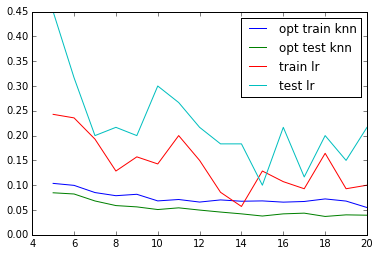

In [223]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

lr=LogisticRegression()
N=200
n=20
K=2
n_informatives=range(5,21)
opt_test_errs_knn=zeros(len(n_informatives))
opt_train_errs_knn=zeros(len(n_informatives))
test_errs_lr=zeros(len(n_informatives))
train_errs_lr=zeros(len(n_informatives))
for i,n_informative in enumerate(n_informatives):
    best_k,test_err,train_err=knn_eval(N,n_features=n,n_classes=K,n_informative=n_informative)
    opt_train_errs_knn[i]=train_err[best_k]
    opt_test_errs_knn[i]=test_err[best_k]
    X, y = make_classification(n_samples=N, n_features=n, n_classes=K, n_informative=n_informative,n_redundant=0,random_state=333)
    X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,random_state=42)
    lr.fit(X_train,y_train)
    train_errs_lr[i]=zero_one_loss(y_train,lr.predict(X_train))
    test_errs_lr[i]=zero_one_loss(y_test,lr.predict(X_test))
    
    
plot(n_informatives,opt_train_errs_knn,label='opt train knn')
plot(n_informatives,opt_test_errs_knn,label='opt test knn')
plot(n_informatives,train_errs_lr,label='train lr')
plot(n_informatives,test_errs_lr,label='test lr')
plt.legend()
plt.show()

**Q:** Koji je model manje robusan na prisustvo nebitnih značajki? Što mislite, zašto je tomu tako?

### *4. "Prokletstvo dimenzionalnosti"

<span style="color:green">(Rješavanje ovog zadatka nije obavezno već donosi dodatne bodove.)</span>

["Prokletstvo dimenzionalnosti"](https://en.wikipedia.org/wiki/Curse_of_dimensionality) zbirni je naziv za niz fenomena povezanih s visokodimenzijskim prostorima. Ti fenomeni, koji se uglavnom protive našoj intuiciji, u većini slučajeva dovode do toga da se s porastom broja dimenzija (značajki) smanjenje točnost modela. Na to su osobito osjetljivi klasifikacijski modeli temeljeni na udaljenosti, kao što je algoritam k-nn. Svrha ovog zadatka jest ispitati kako povećanje broja dimenzija utječe na algoritam k-nn.

### (a) 

Općenito, povećanje dimenzija dovodi do toga da sve točke u ulaznome prostoru postaju (u smislu euklidske udaljenosti) sve udaljenije jedne od drugih te se, posljedično, gube razlike u udaljenostima između točaka. Eksperimentalno ćemo provjeriti da je to doista slučaj. 

Proučite funkciju `sklearn.metrics.pairwise.pairwise_distances`. Generirajte 100 slučajnih vektora u $n=5$ dimenzija te izračunajte prosječnu euklidsku udaljenost između svih parova tih vektora. Ponovite to za $n=10$ dimenzija.

In [27]:
from sklearn.metrics.pairwise import pairwise_distances

vectors=np.random.rand(100,5)
dists=pairwise_distances(vectors,vectors)
#print(dists.diagonal())
print(np.average(dists))

vectors=np.random.rand(100,10)
dists=pairwise_distances(vectors,vectors)
print(np.average(dists))

vectors=np.random.rand(100,5)
dists=pairwise_distances(vectors,vectors,metric='cosine')
#print(dists.diagonal())
print(np.average(dists))

vectors=np.random.rand(100,10)
dists=pairwise_distances(vectors,vectors,metric='cosine')
print(np.average(dists))

yy=np.random.randint(2, size=100)

0.89332612848
1.23713534532
0.217927727706
0.260486233035


Sada ponovite isti eksperiment, ali koristeći kosinus kao mjeru sličnosti (funkciji `pairwise_distances` postavite `metric='cosine'`).

**Q:** Pokušajte objasniti razlike u rezultatima. Koju biste od ovih dviju mjera koristili za klasifikaciju visokodimenzijskih podatakaka?

### (b)

Proučite funkciju [sklearn.neighbors.NearestNeighbors](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors). Pomoću nje, definirajte funkciju `eval_neighbors(X, y, n_neighbors=5, metric='euclidean')` koja za zadani skup za učenje `(X,y)` najprije izračunava susjede za svaki primjer iz `X`, a zatim izračunava (1) prosječan broj susjeda koji su iste klase kao i primjer čiji su oni susjedi te (2) udio primjera u `X` čija je klasa jednaka većinskoj klasi njegovih susjeda.

In [36]:

def eval_neighbors(X,y,n_neighbors=5,metric='euclidean'):
   
    nn=NearestNeighbors(n_neighbors=n_neighbors,metric=metric,algorithm='brute')
    nn.fit(X)
    broj_susjeda_iste_klase=0
    vecinski=0
    dists,indices=nn.kneighbors()
    for i,x in enumerate(X):
        oznaka_x=y[i]
        oznake=y[indices[i]]
        pom=oznake[oznake==oznaka_x]
        broj=len(pom)
        broj_susjeda_iste_klase+=broj
        if(broj>n_neighbors/2):
            vecinski+=1
    print(broj_susjeda_iste_klase)
    return (broj_susjeda_iste_klase/len(y),vecinski/len(y))

eval_neighbors(vectors,yy)

215


(2.15, 0.36)

Sada nas zanima kako povećanje broja dimenzija utječe na susjedstvo primjera, kada se ono izračunava euklidskom udaljenošću. Skicirajte krivulje dviju vrijednosti koje izračunava funkcija `eval_neighbors` (broj susjeda s istom oznakom kao i središnji primjer te broj primjera s oznakom jednakom većinskim oznakama susjeda) kao funkcije broja dimenzija $n$, $n\in\{10,60,\dots,960\}$. Eksperiment provedite na sintetički generiranome skupu od $N=1000$ primjera sa $K=5$ klasa.

2772
1767
1576
1405
1396
1240
1264
1278
1171
1178
1158
1257
1203
1226
1180
1133
1160
1288
1167
1160


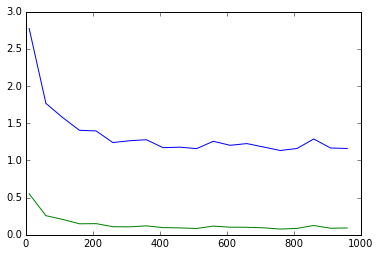

In [37]:

ns=range(10,961)
prvo=zeros(len(ns))
drugo=zeros(len(ns))
out=[]
for n in range(10,961,50):
    X, y = make_classification(n_samples=1000, n_features=n, n_classes=5, n_informative=5, n_redundant=0, n_clusters_per_class=2,random_state=19)
    out.append(eval_neighbors(X,y))
out=np.array(out)
plot(range(10,961,50),out[:,0])
plot(range(10,961,50),out[:,1])

**Q:** Je li rezultat očekivan? Obrazložite.
    
**Q:** Uzrokuje li smanjenje broja susjeda koji imaju istu oznaku kao i njihov središnji primjer nužno i smanjenje točnosti klasifikacije? Obrazložite.

Ponovite isti eksperiment i za kosinusnu udaljenost.

2810
1979
1773
1626
1571
1367
1352
1415
1280
1314
1295
1304
1292
1297
1245
1225
1300
1282
1238
1242


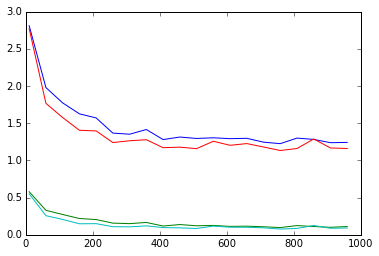

In [38]:

ns=range(10,961)
prvo=zeros(len(ns))
drugo=zeros(len(ns))
out2=[]
for n in range(10,961,50):
    X, y = make_classification(n_samples=1000, n_features=n, n_classes=5, n_informative=5, n_redundant=0, n_clusters_per_class=2,random_state=19)
    out2.append(eval_neighbors(X,y,metric='cosine'))
out2=np.array(out2)
plot(range(10,961,50),out2[:,0])
plot(range(10,961,50),out2[:,1])
plot(range(10,961,50),out[:,0])
plot(range(10,961,50),out[:,1])

### 5. Primjena algoritma k-nn na skupu "101 Questions"

U ovom zadatku algoritam k-nn primijenit ćemo na skup podataka "101 Questions". Skup sadrži odgovore 99 studenata na 101 dihotomno pitanje kojima iskazuju svoju preferenciju prema jednoj od dviju stvari (npr. "more" vs "planina"). Skup podataka preuzmite odavde:

In [40]:
import pandas as pd
q101 = pd.read_csv("https://github.com/jsnajder/StrojnoUcenje/raw/master/data/questions101-2015.csv", comment='#')

### (a)

Prvi stupac (oznaka "Ime/pseudonim:") jest ime odnosno pseudonim anketiranog studenta/ice, dok su ostali stupci odgovori na pitanja. Taj je stupac potrebno ukloniti iz podataka (zašto?). Nadalje, na dva od 101 pitanja svih 99 anketiranih studenata dalo je identičan odgovor. Pronađite koja su to dva pitanja ([pomoć](http://stackoverflow.com/questions/30503321/finding-count-of-distinct-elements-in-dataframe-in-each-column)) te ih uklonite (uklonite odgovarajuće retke). U načelu ne bi bio problem da te značajke zadržimo, međutim, zbog načina na koji ćemo napraviti predobradu podataka, opisan u nastavku, bitno je ipak da ih uklonimo.

Odgovori na pitanja kategoričke su slučajne varijable. Premda bismo načelno mogli primijeniti algoritam k-nn na kategoričke značajke, implementacija u sklearnu to ne dopušta, pa je kategoričke značajke potrebno pretvoriti u numeričke. Pretvorba kategoričkih u numeričke značajke tipično se provodi tzv. *one-hot* kodiranjem. Upoznajte se s tim kodiranjem i zašto je ono potrebno: [one-hot encoding](http://stackoverflow.com/questions/17469835/one-hot-encoding-for-machine-learning).

Provedite one-hot kodiranje podataka (nakon izbacivanja dvaju suvišnih stupaca). To možete najlakše učiniti izravno nad pandas-okvirom, funkcijom [`get_dummies`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

**Q:** Objasnite zašto kategoričke značajke kodiramo one-hot postupkom, a ne nekim drugim (npr. zašto ih jednostavno ne indeksiramo po vrijednostima)?

**Q:** Koja je dimenzija podataka q101 nakon *one-hot* kodiranja? Zašto?

In [41]:
import pandas as pd
imena=q101.get('Ime/pseudonim:')


In [42]:

q101 = q101.drop('Ime/pseudonim:', axis=1)
print(q101.get_values().shape)


(99, 101)


In [43]:
import pandas as pd
dist=q101.T.apply(lambda x: x.nunique(),axis=1)
stupci=dist[dist==1].index
q101=q101.drop(stupci,axis=1)
print(q101.get_values().shape)
#print(q101)
q101oh=pd.get_dummies(q101)
print(q101oh.shape)

(99, 99)
(99, 198)


### (b)

Proučite funkciju [sklearn.neighbors.NearestNeighbors](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors). Pomoću te funkcije, ispišite za svakog od 99 anketiranih studenata/ica njihovih pet najbližih susjeda po euklidskoj mjeri udaljenosti. Ispišite imena odnosno pseudonim svakog studenta/ice te također imena odnosno pseudonim njihovih pet najbližih susjeda.

In [44]:
from sklearn.neighbors import NearestNeighbors
k=2
nn=NearestNeighbors(metric='euclidean',n_neighbors=k)
hn=NearestNeighbors(metric='hamming',n_neighbors=k)
nn.fit(q101oh)
hn.fit(q101oh)
dists_e,indices_e=nn.kneighbors()
dists_h,indices_h=hn.kneighbors()
for i,x in enumerate(q101oh.get_values()):
    print("Osoba:",imena[i])
    print("Susjedi: ",imena[indices_e[i]])
    print("Euklidske  Udaljenosti: ",dists_e[i])
    print("Hammingove Udaljenosti:",dists_h[i]*198)
    print("-------")

Osoba: Zdravko Mamic
Susjedi:  89    kale
16      ja
Name: Ime/pseudonim:, dtype: object
Euklidske  Udaljenosti:  [ 6.63324958  6.78232998]
Hammingove Udaljenosti: [ 44.  46.]
-------
Osoba: Josip
Susjedi:  11        Ante
21    maslačak
Name: Ime/pseudonim:, dtype: object
Euklidske  Udaljenosti:  [ 6.63324958  6.78232998]
Hammingove Udaljenosti: [ 44.  46.]
-------
Osoba: Ivan Dundović
Susjedi:  29    Filip
42      Kec
Name: Ime/pseudonim:, dtype: object
Euklidske  Udaljenosti:  [ 6.92820323  7.07106781]
Hammingove Udaljenosti: [ 48.  50.]
-------
Osoba: Vinkovic Tomo
Susjedi:  0    Zdravko Mamic
6            Mateo
Name: Ime/pseudonim:, dtype: object
Euklidske  Udaljenosti:  [ 7.48331477  7.48331477]
Hammingove Udaljenosti: [ 56.  56.]
-------
Osoba: Muškarac24
Susjedi:  96    Jakov Ivančan
51             Mimi
Name: Ime/pseudonim:, dtype: object
Euklidske  Udaljenosti:  [ 7.87400787  7.87400787]
Hammingove Udaljenosti: [ 62.  62.]
-------
Osoba: Ante
Susjedi:  81         Filip
38    Bo

### (c)

Za kategoričke se značajke nerijetko kao mjera udaljenosti koristi [Hammingova udaljenost](https://en.wikipedia.org/wiki/Hamming_distance). Ponovite izračun susjeda za sve primjere iz skupa q101 pomoću Hammingove udaljenosti te usporedite rezultate s onima koje ste dobili s euklidskom udaljenošću.

**Q:** Razlikuju li se rezultati? Razlikuje li se euklidska udaljenost od Hammingove za pojedinačne parove primjera iz skupa q101 (provjerite)? Obrazložite.

### (d)

Želimo predvidjeti odgovore na neka pitanja na temelju poznatih odgovora na neka druga pitanja. Predikciju ćemo ostvariti algoritmom k-nn, što zapravo znači da će se predviđanje odvijati tako da će se za poznate odgovore na pitanja najprije pronaći studenti koji su na sličan način odgovorili na ta pitanja (susjedi), a onda će se predikcija izračunati kao njihov većinski odgovor. Odgovore na prvih 49 pitanja koristit ćemo kao poznate odgovore, te pomoću njih pokušati predvidjeti odgovore na ostala 49 pitanja.

Skup q101, binariziran na način kako je opisano u dijelu (a), podijelite po stupcima u dvije polovice (svaka po 49 značajki): prvu polovicu koristit ćemo kao značajke (poznati odgovori), a drugu polovicu čine odgovori koje ćemo pokušati predvidjeti (nepoznati odgovori). Oba ova skupa podijelite na skupove za učenje i ispitivanje u omjeru 7:3.

Za svaki od 49 nepoznatih odgovora, trenirajte po jedan k-nn klasifikator na 49 poznatih odogovora. Klasifikatore naravno trenirajte na skupu za učenje i ispitajte na skupu za ispitivanje. Paralelno s time, za svaki od 49 nepoznatih odgovora trenirajte i po jedan referentni klasifikator, koji će sve primjere jednostavno klasificirati u najčešću klasu za dotično pitanje. U tu svrhu iskoristite model [`sklearn.dummy.DummyClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html). Sada za svaki od 49 nepoznatih odgovora ispišite točnost klasifikatora k-nn, točnost referentnog klasifikatora te razliku između njih. Dodatno, za svako pitanje ispišite i dva ponuđena odgovora, kako bismo mogli vidjeti za koja to pitanja klasifikator radi dobro.

In [45]:
from sklearn.dummy import DummyClassifier
dummy=DummyClassifier()
clf.n_neighbours=5
X_binary=q101oh.get_values()
X_train, X_test, Y_train, Y_test = train_test_split(X_binary[:, 0:99], X_binary[:, 99:198], test_size=0.3)

for i in range(0,49):
    y_train=Y_train[:,i*2]
    y_test=Y_test[:,i*2]
    clf.fit(X_train,y_train)
    dummy.fit(X_train,y_train)
    knn_acc=accuracy_score(y_test,clf.predict(X_test))
    dummy_acc=accuracy_score(y_test,dummy.predict(X_test))
    print("Ponuđeno: ",q101oh.axes[1][49+i*2-1],q101oh.axes[1][49+i*2])
    print(knn_acc,dummy_acc,knn_acc-dummy_acc)
   
   

Ponuđeno:  Q26_Sladoled Q26_Torta
0.7 0.533333333333 0.166666666667
Ponuđeno:  Q27_Iran Q27_Palestina
0.833333333333 0.7 0.133333333333
Ponuđeno:  Q28_Arial Q28_Times New Roman
0.766666666667 0.766666666667 0.0
Ponuđeno:  Q29_50 cent Q29_TBF
0.566666666667 0.4 0.166666666667
Ponuđeno:  Q30_Rolling Stones Q30_The Beatles
0.566666666667 0.366666666667 0.2
Ponuđeno:  Q31_Jodie Foster Q31_Leonardo di Caprio
0.933333333333 0.933333333333 0.0
Ponuđeno:  Q32_Avion Q32_Vlak
0.633333333333 0.633333333333 0.0
Ponuđeno:  Q33_Novac Q33_Sreća
0.633333333333 0.4 0.233333333333
Ponuđeno:  Q34_Nedjelja Q34_Subota
0.566666666667 0.4 0.166666666667
Ponuđeno:  Q35_Jabuka Q35_Čokolada
0.866666666667 0.866666666667 0.0
Ponuđeno:  Q36_Njemačka Q36_UK
0.666666666667 0.6 0.0666666666667
Ponuđeno:  Q37_Plivanje Q37_Ronjenje
0.933333333333 0.933333333333 0.0
Ponuđeno:  Q38_Orada Q38_Piletina
0.566666666667 0.433333333333 0.133333333333
Ponuđeno:  Q39_Nova TV Q39_RTL Televizija
0.9 0.633333333333 0.266666666667


**Q:** Za koja pitanja klasifikator radi bolje od referentnog modela?
    
**Q:** Zašto za dotična pitanja klasifikator radi dobro, a za druga ne?

### 6. Stabla odluke

U ovom zadatku usredotočit ćemo se na primjenu stabala odluke za problem klasifikacije. Upoznajte se s klasom [`DecisionTreeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier). Ako nije rečeno drugačije, koristite pretpostavljene parametre modela. 

Radit ćemo sa skupom podataka *Titanic*. S obzirom na to da taj skup podataka za neke primjere nema vrijednosti svih atributa, a i da su neki atributi nebrojčani, prvo ga trebamo obraditi.

### (a)

Prvo učitajte skup podataka _Titanic_ i izdvojite samo sljedeće atribute: _Pclass, Sex, Age, SibSp, Parch,_ i _Embarked_. To su značajke s kojima ćemo raditi. Ciljnu klasu predstavlja atribut _Survived_.

In [33]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/jsnajder/StrojnoUcenje/master/data/titanic-train.csv')



In [34]:
from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [35]:
df=DataFrameImputer().fit_transform(df)
df1 = df[['Pclass','Sex','Age','SibSp','Parch','Embarked']]
ciljna=df[['Survived']]
titanic_X=df1.as_matrix()
titanic_y=ciljna.as_matrix()
print(titanic_X)

[[3 'male' 22.0 1 0 'S']
 [1 'female' 38.0 1 0 'C']
 [3 'female' 26.0 0 0 'S']
 ..., 
 [3 'female' 29.69911764705882 1 2 'S']
 [1 'male' 26.0 0 0 'C']
 [3 'male' 32.0 0 0 'Q']]


**Q:** Pogledajte ostale značajke u skupu podataka. Smatrate li da bi bilo dobro uključiti još koju? Zašto?

### (b)

Koristeći razred [`LabelEncoder`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) pretvorite nebrojčane atribute _Sex_ i _Embarked_ u numeričke (ovakav pristup moguć je kod stabala odluke, ali inače se koristi [`OneHotEncoder`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)).

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
titanic_X[:,1] = le.fit_transform(titanic_X[:,1])
titanic_X[:,-1] = le.fit_transform(titanic_X[:,-1])
print(titanic_X)

[[3 1 22.0 1 0 2]
 [1 0 38.0 1 0 0]
 [3 0 26.0 0 0 2]
 ..., 
 [3 0 29.69911764705882 1 2 2]
 [1 1 26.0 0 0 0]
 [3 1 32.0 0 0 1]]


**Q:** Mogli smo koristiti i spomenuti _hot-one encoding_. Zašto to kod stabala odluke često ipak nije najbolja ideja?

### (c) 

U skupu podataka _Titanic_ za neke primjeri nisu poznate vrijednosti svih atributa. Proučite razred [`Imputer`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html) i pomoću njega riješite ovaj problem tako da nedostajuće vrijednosti zamijenite najčešćom vrijednošću dotičnog atributa kroz primjere.

### (d)

Na tako pripremljenome skupu _Titanic_ trenirajte stablo odluke (klasa `DecisionTreeClassifier`). Izgradite dva stabla koristeći dva različita kriterija oabira korijenskog čvora (parametar `criterion`): `entropy` (informacijska dobit) i `gini` (Ginijev indeks). Ispitajte modele na cijelom skupu (istom na kojem ste ih i trenirali) te ispišite točnost modela. Nadalje, član `feature_importances_` sadrži polje kriterijskih vrijednosti za svaki atribut. Ispišite te vrijednosti za oba modela.

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dt1=DecisionTreeClassifier(criterion='entropy')
dt2=DecisionTreeClassifier(criterion='gini')
dt1.fit(titanic_X,titanic_y)
dt2.fit(titanic_X,titanic_y)
print(accuracy_score(titanic_y,dt1.predict(titanic_X)))
print(dt1.feature_importances_)
print(accuracy_score(titanic_y,dt2.predict(titanic_X)))
print(dt2.feature_importances_)

0.937149270483
[ 0.142809    0.28326324  0.3802965   0.09511984  0.05265627  0.04585515]
0.937149270483
[ 0.13125904  0.36049851  0.32010243  0.09032562  0.05443693  0.04337747]


**Q:** Usporedite rezultate modela s kriterijem `entropy` i `gini`. Postoji li razlika? Zašto?

**Q:** Zašto pogreška učenja nije jednaka nuli? Bi li to trebala biti?

**Q:** Koja značajka je korijenska značajka prema kriteriju `entropy`, a koja prema kriteriju `gini`?

### 7. Regularizacija stabala odluke

Pri izgradnji stabla odluke vrlo lako može doći do prenaučenosti s obzirom na to da stablo raste dok se svi primjeri za učenje ispravno ne klasificiraju. Jedan od načina sprječavanja prenaučenosti jest zaustavljanje rasta stabla na određenoj dubini. Spomenuto ograničenje regulira se pomoću parametra `max_depth` konstruktora razreda `DecisionTreeClassifier`.

Podijelite skup podataka _Titanic_ na skup za učenje i na skup za ispitivanje u omjeru 2:3 korištenjem funkcije [`train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html).

Iscrtajte krivulje pogrešaka na skupu za učenje i na skupu za ispitivanje za svaki parametar maksimalne dubine $d$, pri čemu je $d \in \{1,2,\ldots,30\}$. Koristite Ginijev indeks.

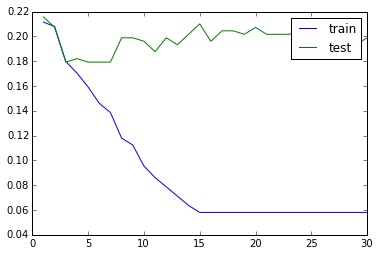

In [38]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import zero_one_loss
titanic_X_train, titanic_X_test, titanic_y_train, titanic_y_test = train_test_split(titanic_X,titanic_y, test_size=0.4,random_state=15)
depths=range(1,31)
train_errs=zeros(len(depths))
test_errs=zeros(len(depths))
for i,depth in enumerate(depths):
    dt2.max_depth=depth
    dt2.fit(titanic_X_train,titanic_y_train)
    train_errs[i]=zero_one_loss(titanic_y_train,dt2.predict(titanic_X_train))
    test_errs[i]=zero_one_loss(titanic_y_test,dt2.predict(titanic_X_test))
plot(depths,train_errs,label='train')
plot(depths,test_errs,label='test')
plt.legend()
plt.show()

**Q:** Na koju biste dubinu ograničili rast stabla i zašto?
    
**Q:** Kojoj strani u grafikonu odgovara područje prenaučenosti, a kojoj područje podnaučenosti?

### 8. Matrice zabune i evaluacijske mjere

Kako bismo se uvjerili koliko naš naučeni model zapravo dobro radi, nužno je provesti evaluaciju modela. Ovaj korak od presudne je važnosti u svim primjenama strojnog učenja, pa je stoga bitno znati provesti evaluaciju na ispravan način. Cilj ovog zadatka jest upoznati se s osnovnim evaluacijskim mjerama temeljenima na matrici zabune (engl. *confusion matrix*).

Preuzmite Glass Identification Data Set, koji opisuje rezultate kemijske analize 214 stakala. Riječ je o klasifikacijskom problemu sa šest klasa: na temelju 9 kemijskih značajki stakla potrebno je, u svrhu forenzičke analize, odrediti o kojoj se od šest vrsta stakla radi. Skup podataka možete učitati na sljedeći način:

In [39]:
data = sp.loadtxt("D:\strojno\glass.data", delimiter=',')
glass_X, glass_y = data[:,1:10], data[:,10]

Ovaj skup podataka ne sadrži nenumeričke atribute niti nedostajuće vrijednosti, stoga ne treba raditi nikakvu obradu. Podijelite skup primjera na skup za učenje i na skup za ispitivanju u omjeru 2:3 (koristite funkciju `train_test_split`). Izgradite stablo odluke na temelju dobivenog skupa za učenje.

In [40]:
print(glass_X.shape)
print(glass_y.shape)
gX_train,gX_test,gy_train,gy_test= train_test_split(glass_X,glass_y, test_size=0.4,random_state=15)
print(gX_train.shape)

(214, 9)
(214,)
(128, 9)


### (a)

Definirajte funkciju `create_confusion_matrix(y_true, y_pred)` koja generira matricu zabune dimenzija $K\times K$, gdje je $K$ broj klasa. Funkcija prima stvarne oznake primjera (`y_true`) i oznake predikcije modela (`y_pred`) te vraća (1) matricu zabune i (2) polje oznaka klasa (gdje su klase poredane onako kako su poredane u matrici zabune). Retci matrice neka odgovaraju stvarnim oznakama (true), a stupci predikcijama modela (pred).

In [80]:
def create_confusion_matrix(y_true,y_pred):
    labels=list(np.unique(y_true))
    K=len(labels)
    matrix=np.zeros((K,K),dtype=int)
    for yt,yp in zip(y_true,y_pred):
           matrix[labels.index(yt),labels.index(yp)]+=1
    return (matrix,labels)

dt2.fit(gX_train,gy_train)
cm,l=create_confusion_matrix(gy_test,dt2.predict(gX_test))
print(cm,l)
sklearn.metrics.confusion_matrix(gy_test,dt2.predict(gX_test))


[[21  5  2  0  0  0]
 [ 6 20  4  1  1  0]
 [ 4  1  0  0  0  0]
 [ 0  0  0  3  0  1]
 [ 0  0  0  3  1  0]
 [ 1  0  0  0  1 11]] [1.0, 2.0, 3.0, 5.0, 6.0, 7.0]


array([[21,  5,  2,  0,  0,  0],
       [ 6, 20,  4,  1,  1,  0],
       [ 4,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  3,  0,  1],
       [ 0,  0,  0,  3,  1,  0],
       [ 1,  0,  0,  0,  1, 11]])

Izračunajte i ispišite matricu zabune za stablo odluke na ispitnome dijelu skupa `glass`. Uvjerite se da vaša implementacija radi jednako kao funkcija [`sklearn.metrics.confusion_matrix`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).

**Q:** Koja je klasa najbrojnija?
    
**Q:** Koja klasa ima najviše pogrešnih pozitivnih klasifikacija (false positives), a koja najviše pogrešnih negativnih klasifikacija (false negatives)?

In [111]:
print('Najbrojnija klasa: ',l[argmax(sum(cm,axis=1))])

def falses(ccm):
    cm=ccm.copy()
    cm[np.eye(cm.shape[0])==1]=0
    falseNegatives=sum(cm,axis=1)
    falsePositives=sum(cm,axis=0)
    return (falseNegatives,falsePositives)

fn,fp=falses(cm)
print("Fns po klasama: ",fn)
print("Fps po klasama: ",fp)

Najbrojnija klasa:  2.0
Fns po klasama:  [ 7 12  5  1  3  2]
Fps po klasama:  [11  6  6  4  2  1]


### (b)

Definirajte funkciju `twoway_confusion_matrix(cm, i)` koja prima matricu zabune `cm` dimenzija $K\times K$ i indeks klase $i$ te izračunava binarnu matricu zabune za klasu $i$ kao pozitivnu klasu.

In [200]:
def twoway_confusion_matrix(ccm,i,labels):
    cm=ccm.copy()
    i=labels.index(i)
    diag=np.diagonal(cm)
    tp=diag[i]
    fn=sum(cm[i,:])-tp
    fp=sum(cm[:,i])-tp
    tn=sum(cm)-tp-fn-fp
    return np.array([[tp,fn],[fp,tn]])
    
    
for i in [1,2,3,5,6,7]:
    print("Matrica zabune za klasu",i,":\n",twoway_confusion_matrix(cm,i,l))

Matrica zabune za klasu 1 :
 [[21  7]
 [11 47]]
Matrica zabune za klasu 2 :
 [[20 12]
 [ 6 48]]
Matrica zabune za klasu 3 :
 [[ 0  5]
 [ 6 75]]
Matrica zabune za klasu 5 :
 [[ 3  1]
 [ 4 78]]
Matrica zabune za klasu 6 :
 [[ 1  3]
 [ 2 80]]
Matrica zabune za klasu 7 :
 [[11  2]
 [ 1 72]]


Izračunajte i ispišite binarne matrice zabune za svih 6 klasa iz skupa `glass`.

### (c)

Pomoću funkcija iz (a) i (b) dijela zadatka, definirajte funkcije `accuracy`, `precision`, `recall` i `f1` za izračun točnosti, preciznosti, odziva odnosno F1-mjere. Svaka od ovih funkcija uzima kao argumente stvarne oznake primjera `y_true` i predviđene oznake `y_pred`. Funkcije trebaju izračunavati mikro i makro varijante ovih mjera, što se određuje opcijom `averaging=micro` odnosno `averaging=macro` (podrazumijevana vrijednost).

Izračunajte vrijednosti ovih evaluacijskih mjera na skupu `glass`. Uvjerite da vaša implementacija daje identične rezultate kao funkcije iz paketa [`metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics). Ove funkcije pretpostavljaju makro-mjere, osim one za F1 koja može primiti i parametar koji definira hoće li se izračunati mikro ili makro vrijednost.

**Q:** Usporedite mikro-F1 i makro-F1. Koja je vrijednost veća? Je li to očekivano i zašto?

**Q:** Koji je odnos između mjera preciznosti, odziva i F1-mjere? Može li F1-mjera biti veća od preciznosti ili odziva? Obrazložite.

**Q:** Zašto su vrijednosti mikro-preciznosti, mikro-odziva i mikro-F1 identične? Hoće li to uvijek biti slučaj?

In [212]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
def micro_matrix(cm,labels):
    sumM=np.zeros((2,2))
    for label in labels:
        m=twoway_confusion_matrix(cm,label,labels)
        sumM=sumM+m
    sumM=sumM/len(labels)
    return sumM

def recall(y_true,y_pred,averaging='macro'):
    cm,labels=create_confusion_matrix(y_true,y_pred)
    if averaging=='micro':
        #sumM=macro_matrix(cm,labels)
        #tp=sumM[0,0]
        #fn=sumM[0,1]
        #print(tp,fp)
        tp=sum(cm.diagonal())
        fn=sum(cm)-tp
        return tp/(tp+fn)
    if averaging=='macro':
        re=0
        for label in labels:
            m=twoway_confusion_matrix(cm,label,labels)
            re=re+(m[0,0]/(m[0,0]+m[0,1]))
        return re/len(labels)


def precision(y_true,y_pred,averaging='macro'):
    cm,labels=create_confusion_matrix(y_true,y_pred)
    if averaging=='micro':
        tp=sum(cm.diagonal())
        fp=sum(cm)-tp
        return tp/(tp+fp)
    if averaging=='macro':
        pre=0
        for label in labels:
            m=twoway_confusion_matrix(cm,label,labels)
            pre=pre+(m[0,0]/(m[0,0]+m[1,0]))
        return pre/len(labels)

def accuracy(y_true,y_pred,averaging='macro'):
    cm,labels=create_confusion_matrix(y_true,y_pred)
    if averaging=='macro':
        
        tp=sum(cm.diagonal())
        alls=sum(cm)
        return tp/alls
    if averaging=='micro':
        acc=0
        for i,label in enumerate(labels):
            m=twoway_confusion_matrix(cm,label,labels)
            acc=acc+(sum(m.diagonal())/sum(m))
        return acc/len(labels)
    
def f1(y_true,y_pred,averaging='macro'):
    prec=precision(y_true,y_pred,averaging=averaging)
    rec=recall(y_true,y_pred,averaging=averaging)
    return 2*prec*rec/(prec+rec)


print("Mikro")
print("Odziv: ",recall_score(gy_test,dt2.predict(gX_test),average='micro'))
#print(recall(gy_test,dt2.predict(gX_test),averaging='micro'))
#print("Preciznost:", precision_score(gy_test,dt2.predict(gX_test),average='micro'))
print(precision(gy_test,dt2.predict(gX_test),averaging='micro'))
print("Točnost: ", accuracy(gy_test,dt2.predict(gX_test),'micro'))
print("F1: ",f1_score(gy_test,dt2.predict(gX_test),average='micro'))

print("Makro")
print("Odziv: ",recall_score(gy_test,dt2.predict(gX_test),average='macro'))
#print(recall(gy_test,dt2.predict(gX_test),averaging='macro'))
print("Preciznost: ",precision_score(gy_test,dt2.predict(gX_test),average='macro'))
#print(precision(gy_test,dt2.predict(gX_test),averaging='macro'))
print("Točnost: ",accuracy_score(gy_test,dt2.predict(gX_test)))
#print(f1(gy_test,dt2.predict(gX_test),'macro'))
print("F1: ",f1_score(gy_test,dt2.predict(gX_test),average='macro'))

Mikro
Odziv:  0.651162790698
0.651162790698
Točnost:  0.883720930233
F1:  0.651162790698
Makro
Odziv:  0.536858974359
Preciznost:  0.517342032967
Točnost:  0.651162790698
F1:  0.516804000597
